In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
data=pd.read_csv(r'C:\Users\TAHIL MOHAMMED SYED\OneDrive\Desktop\dataframe_1.csv')
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [ ]:















)





In [5]:
data=pd.read_csv(r'C:\Users\TAHIL MOHAMMED SYED\OneDrive\Desktop\dataframe_1.csv')
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [7]:
data[data.input.isnull()]
data=data[~data['input'].isnull()]
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [8]:
data.info()data[data.duplicated()]
data=data[~data.duplicated()]data.info()


SyntaxError: invalid syntax (1656668400.py, line 1)

In [9]:
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


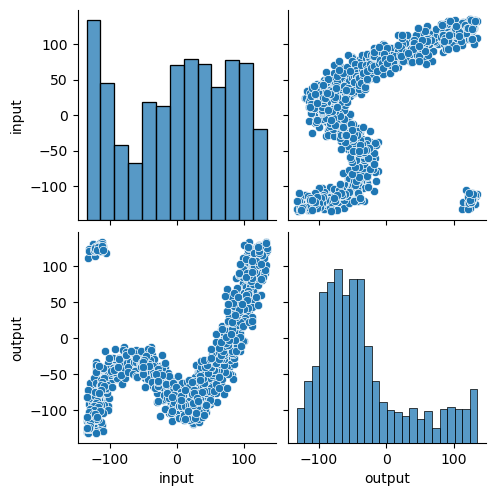

In [10]:
sns.pairplot(data)
Q1 = data['output'].quantile(0.25)
Q3 = data['output'].quantile(0.75)
IQR = Q3 - Q1


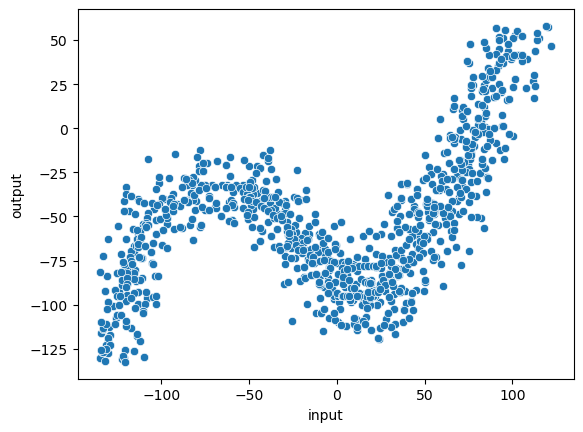

In [11]:
data_or = data[~((data['output'] < (Q1 - 1.0 * IQR)) |(data['output'] > (Q3 + 1.0 * IQR)))]
sns.scatterplot(x=data_or['input'], y=data_or['output'])
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
X=data["input"]
y=data["output"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
print(x_train.shape, x_test.shape)

(1356,) (340,)


In [19]:
ss=StandardScaler()
x_train_trans=ss.fit_transform(x_train.values.reshape(-1,1))
x_test_trans=ss.transform(x_test.values.reshape(-1,1))

In [20]:
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('KNeighbors Regression', KNeighborsRegressor()))
models.append(('Decision Tree Regression', DecisionTreeRegressor()))
models.append(('Random Forest Regression', RandomForestRegressor()))
models.append(('Support Vector Regression', SVR()))
best_model = None
best_accuracy = -1

In [21]:

for name, model in models:
    model.fit(x_train_trans, y_train)
    y_pred = model.predict(x_test_trans)
    mse = mean_squared_error(y_test, y_pred)
    print(mse)
    if mse < best_accuracy or best_accuracy == -1:
        best_accuracy = mse
        best_model = (name, model)
print(f"The best model is {best_model[0]} with accuracy {best_accuracy}")

3291.4050360956
1494.380625248766
1698.5681003939812
1480.272543606206
1497.1285366683576
The best model is Random Forest Regression with accuracy 1480.272543606206
